## Importing The Libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab

from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action = 'ignore', category = DeprecationWarning)
warnings.filterwarnings(action = 'ignore', category = FutureWarning)

## Load The Dataset

In [4]:
df=pd.read_csv('drive/MyDrive/Insurance Dataset.csv')
df

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,0,Cellulitis & other skin infections,3,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,122,0,Other pneumonia,2,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,New York City,Bronx,1169.0,70 or Older,F,Other Race,Spanish/Hispanic,6,Emergency,Skilled Nursing Home,106,29,Cardiac arrhythmia & conduction disorders,2,3.0,Medical,0,N,Y,69650.41,13896.82,0.199522,1,3
1048571,New York City,Bronx,1169.0,0 to 17,F,Other Race,Not Span/Hispanic,2,Emergency,Home or Self Care,8,231,Other infectious & parasitic diseases,2,1.0,Medical,0,N,N,13587.38,3918.35,0.288382,1,3
1048572,New York City,Bronx,1169.0,50 to 69,M,Other Race,Spanish/Hispanic,13,Emergency,Medicare Cert Long Term Care Hospital,151,88,Hepatic coma & other major acute liver disorders,4,4.0,Medical,0,N,Y,104629.78,24746.64,0.236516,0,3
1048573,New York City,Bronx,1169.0,30 to 49,F,Black/African American,Not Span/Hispanic,2,Emergency,Home or Self Care,143,86,"Inguinal, femoral & umbilical hernia procedures",1,1.0,Surgical,0,N,Y,27521.41,6766.04,0.245846,1,3


In [5]:
df.shape

(1048575, 24)

In [6]:
df.size

25165800

In [7]:
#Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1046119 non-null  object 
 1   Hospital County                        1046119 non-null  object 
 2   Hospital Id                            1046119 non-null  float64
 3   Age                                    1048575 non-null  object 
 4   Gender                                 1048575 non-null  object 
 5   Cultural_group                         1048575 non-null  object 
 6   ethnicity                              1048575 non-null  object 
 7   Days_spend_hsptl                       1048575 non-null  object 
 8   Admission_type                         1048575 non-null  object 
 9   Home or self care,                     1048575 non-null  object 
 10  ccs_diagnosis_code                     104

In [8]:
df1=df.drop(['Hospital Id','Area_Service','Cultural_group','ethnicity','Abortion','Tot_cost','Weight_baby'],axis=1)

In [9]:
df1 = df1.rename({ 'Hospital County':'Hospital_County','Mortality risk': 'mortalityrisk','ratio_of_total_costs_to_total_charges':'ratio_ofcost_to_charge','Home or self care,':'home_or_selfcare','Emergency dept_yes/No':'emergency_dept' }, axis=1)

In [10]:
df1.head()

,Hospital_County,Age,Gender,Days_spend_hsptl,Admission_type,home_or_selfcare,ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,mortalityrisk,Surg_Description,emergency_dept,Tot_charg,ratio_ofcost_to_charge,Result,Payment_Typology
0,Allegany,30 to 49,F,4,Elective,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,Y,5511.95,1.012798,1,1
1,Allegany,70 or Older,F,4,Urgent,Short-term Hospital,197,0,Cellulitis & other skin infections,3,2.0,Medical,Y,4783.20,1.079365,1,1
2,Allegany,30 to 49,F,3,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,Y,3829.15,1.059379,1,1
3,Allegany,0 to 17,F,1,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,Y,1108.20,1.484167,0,1
4,Allegany,70 or Older,F,3,Elective,Home or Self Care,122,0,Other pneumonia,2,3.0,Medical,Y,3418.18,0.986161,1,1


In [11]:
df1.shape

(1048575, 17)

## Duplicates

In [12]:
#Count of duplicated rows
df1[df1.duplicated()].shape


(21686, 17)

In [13]:
#Print the duplicated rows
df1[df1.duplicated()]

,Hospital_County,Age,Gender,Days_spend_hsptl,Admission_type,home_or_selfcare,ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,mortalityrisk,Surg_Description,emergency_dept,Tot_charg,ratio_ofcost_to_charge,Result,Payment_Typology
271,Allegany,0 to 17,M,3,Newborn,Home or Self Care,218,115,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,N,2319.75,0.434788,0,1
291,Allegany,0 to 17,F,1,Newborn,Home or Self Care,218,228,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,N,884.50,0.436447,1,1
352,Allegany,0 to 17,F,1,Newborn,Home or Self Care,218,228,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,N,884.50,0.436447,1,1
502,Allegany,0 to 17,M,3,Newborn,Home or Self Care,218,115,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,N,2319.75,0.434788,1,1
533,Allegany,0 to 17,F,2,Newborn,Home or Self Care,218,228,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,N,1401.50,0.431629,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028997,Bronx,0 to 17,F,2,Elective,Home or Self Care,83,227,Seizure,1,1.0,Medical,N,12557.00,0.235996,1,2
1035973,Bronx,0 to 17,F,2,Elective,Home or Self Care,83,227,Seizure,2,1.0,Medical,N,12500.00,0.236809,1,3
1043713,Bronx,0 to 17,M,10,Emergency,Home or Self Care,135,0,"Other gastroenteritis, nausa & vomiting",3,3.0,Medical,Y,65223.50,0.304385,0,3
1044547,Bronx,0 to 17,M,4,Elective,Home or Self Care,83,227,Seizure,1,1.0,Medical,N,24557.00,0.240041,1,2


In [14]:
#remove the duplicated rows
data=df1.drop_duplicates()

In [15]:
data.size

17457113

## Missing Values

In [16]:
data[data.isnull().any(axis=1)]

,Hospital_County,Age,Gender,Days_spend_hsptl,Admission_type,home_or_selfcare,ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,mortalityrisk,Surg_Description,emergency_dept,Tot_charg,ratio_ofcost_to_charge,Result,Payment_Typology
12,NaN,30 to 49,M,2,Elective,Home or Self Care,126,0,Infections of upper respiratory tract,3,3.0,Medical,Y,2896.70,1.323580,1,1
16,NaN,30 to 49,M,3,Urgent,Home or Self Care,126,0,Infections of upper respiratory tract,1,1.0,Medical,Y,3472.25,1.172107,1,1
33,NaN,70 or Older,F,1,Urgent,Home or Self Care,122,0,Other pneumonia,2,3.0,Medical,Y,2509.75,1.050590,1,1
77,NaN,70 or Older,F,3,Elective,Skilled Nursing Home,58,202,"Malnutrition, failure to thrive & other nutrit...",3,2.0,Medical,N,2998.00,1.072593,1,2
86,NaN,30 to 49,F,4,Elective,Home or Self Care,159,0,Kidney & urinary tract infections,2,1.0,Medical,Y,4806.25,1.087221,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044288,NaN,18 to 29,F,1,Emergency,Home or Self Care,180,122,Ectopic pregnancy procedure,1,1.0,Surgical,Y,11398.46,0.196141,0,2
1044417,NaN,30 to 49,F,1,Emergency,Home or Self Care,177,127,"D&C, aspiration curettage or hysterotomy for o...",1,1.0,Surgical,Y,20093.35,0.232213,1,2
1044832,NaN,18 to 29,F,1,Emergency,Home or Self Care,180,122,Ectopic pregnancy procedure,1,1.0,Surgical,Y,9393.39,0.204617,1,3
1045584,NaN,30 to 49,F,1,Emergency,Home or Self Care,177,127,"D&C, aspiration curettage or hysterotomy for o...",1,1.0,Surgical,Y,23802.40,0.248288,0,2


In [17]:
data.isnull().sum()

Hospital_County           2455
Age                          0
Gender                       0
Days_spend_hsptl             0
Admission_type               0
home_or_selfcare             0
ccs_diagnosis_code           0
ccs_procedure_code           0
apr_drg_description          0
Code_illness                 0
mortalityrisk               39
Surg_Description             0
emergency_dept               0
Tot_charg                    0
ratio_ofcost_to_charge       0
Result                       0
Payment_Typology             0
dtype: int64

In [18]:
#plt.figure(figsize=(20,20))
#sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

In [19]:
data['mortalityrisk'].fillna(data.mortalityrisk.median(),inplace=True)

In [20]:
df=data.dropna()

In [21]:
df.isnull().sum()

Hospital_County           0
Age                       0
Gender                    0
Days_spend_hsptl          0
Admission_type            0
home_or_selfcare          0
ccs_diagnosis_code        0
ccs_procedure_code        0
apr_drg_description       0
Code_illness              0
mortalityrisk             0
Surg_Description          0
emergency_dept            0
Tot_charg                 0
ratio_ofcost_to_charge    0
Result                    0
Payment_Typology          0
dtype: int64

In [22]:
#Datatype conversion
df['mortalityrisk']=df['mortalityrisk'].astype('int64')
#df['HospitalId']=df['HospitalId'].astype('int64')
#df['Tot_charg']=df['Tot_charg'].astype('int64')
#df['Tot_cost']=df['Tot_cost'].astype('int64')
#df['ratio_ofcost_to_charge']=df['ratio_ofcost_to_charge'].astype('int64')
#df

In [23]:
df.dtypes

Hospital_County            object
Age                        object
Gender                     object
Days_spend_hsptl           object
Admission_type             object
home_or_selfcare           object
ccs_diagnosis_code          int64
ccs_procedure_code          int64
apr_drg_description        object
Code_illness                int64
mortalityrisk               int64
Surg_Description           object
emergency_dept             object
Tot_charg                 float64
ratio_ofcost_to_charge    float64
Result                      int64
Payment_Typology            int64
dtype: object

In [24]:
df['Days_spend_hsptl'].replace('120 +', 120,inplace=True)

In [25]:
df['Days_spend_hsptl']=pd.to_numeric(df['Days_spend_hsptl'])

In [26]:
df['Days_spend_hsptl'].unique()

array([  4,   3,   1,   2,   5,   6,  14,  12,   9,   8,  10,   7,  22,
        11,  16,  15,  25,  13,  17,  28,  18,  19,  23,  38,  20,  24,
        26,  21,  27,  30,  29,  39,  87,  35,  37,  32,  55,  56,  49,
       110,  69,  75,  42,  51,  47,  45,  46,  40,  34,  79,  43, 120,
        65,  41,  31,  50,  59,  44,  36,  70, 115,  58,  94,  33,  68,
        67,  54,  80,  85,  95,  78,  91,  88,  48,  52,  63,  57,  74,
        64,  53,  62,  97,  72, 118,  81,  90,  86, 106, 112, 105, 114,
        66,  89,  83,  84,  82,  93, 116,  71,  60,  73,  61,  92,  76,
        96,  77, 104, 100, 103, 102, 117, 108,  99, 107,  98, 101, 119,
       111, 109, 113])

## Feature Engineering

In [27]:
x=df.iloc[:, [0,1,2,4,5,8,11,12]]
x

,Hospital_County,Age,Gender,Admission_type,home_or_selfcare,apr_drg_description,Surg_Description,emergency_dept
0,Allegany,30 to 49,F,Elective,Home or Self Care,Other pneumonia,Medical,Y
1,Allegany,70 or Older,F,Urgent,Short-term Hospital,Cellulitis & other skin infections,Medical,Y
2,Allegany,30 to 49,F,Urgent,Home or Self Care,Other pneumonia,Medical,Y
3,Allegany,0 to 17,F,Urgent,Home or Self Care,Other pneumonia,Medical,Y
4,Allegany,70 or Older,F,Elective,Home or Self Care,Other pneumonia,Medical,Y
...,...,...,...,...,...,...,...,...
1048570,Bronx,70 or Older,F,Emergency,Skilled Nursing Home,Cardiac arrhythmia & conduction disorders,Medical,Y
1048571,Bronx,0 to 17,F,Emergency,Home or Self Care,Other infectious & parasitic diseases,Medical,N
1048572,Bronx,50 to 69,M,Emergency,Medicare Cert Long Term Care Hospital,Hepatic coma & other major acute liver disorders,Medical,Y
1048573,Bronx,30 to 49,F,Emergency,Home or Self Care,"Inguinal, femoral & umbilical hernia procedures",Surgical,Y


In [28]:
from sklearn.preprocessing import LabelEncoder
Labelencoder_X= LabelEncoder()
X=x.apply(LabelEncoder().fit_transform)
X

,Hospital_County,Age,Gender,Admission_type,home_or_selfcare,apr_drg_description,Surg_Description,emergency_dept
0,1,2,0,0,7,237,0,1
1,1,4,0,5,17,38,0,1
2,1,2,0,5,7,237,0,1
3,1,0,0,5,7,237,0,1
4,1,4,0,0,7,237,0,1
...,...,...,...,...,...,...,...,...
1048570,2,4,0,1,18,28,0,1
1048571,2,0,0,1,7,227,0,0
1048572,2,3,1,1,15,99,0,1
1048573,2,2,0,1,7,109,2,1


In [29]:
X.dtypes

Hospital_County        int64
Age                    int64
Gender                 int64
Admission_type         int64
home_or_selfcare       int64
apr_drg_description    int64
Surg_Description       int64
emergency_dept         int64
dtype: object

In [30]:
data=df.drop(["Hospital_County","Age","Gender","Admission_type","home_or_selfcare","apr_drg_description","Surg_Description","emergency_dept"],axis=1)

In [31]:
fraud=pd.concat([X,data],axis=1)
fraud

,Hospital_County,Age,Gender,Admission_type,home_or_selfcare,apr_drg_description,Surg_Description,emergency_dept,Days_spend_hsptl,ccs_diagnosis_code,ccs_procedure_code,Code_illness,mortalityrisk,Tot_charg,ratio_ofcost_to_charge,Result,Payment_Typology
0,1,2,0,0,7,237,0,1,4,122,0,1,1,5511.95,1.012798,1,1
1,1,4,0,5,17,38,0,1,4,197,0,3,2,4783.20,1.079365,1,1
2,1,2,0,5,7,237,0,1,3,122,0,1,1,3829.15,1.059379,1,1
3,1,0,0,5,7,237,0,1,1,122,0,1,1,1108.20,1.484167,0,1
4,1,4,0,0,7,237,0,1,3,122,0,2,3,3418.18,0.986161,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,4,0,1,18,28,0,1,6,106,29,2,3,69650.41,0.199522,1,3
1048571,2,0,0,1,7,227,0,0,2,8,231,2,1,13587.38,0.288382,1,3
1048572,2,3,1,1,15,99,0,1,13,151,88,4,4,104629.78,0.236516,0,3
1048573,2,2,0,1,7,109,2,1,2,143,86,1,1,27521.41,0.245846,1,3


In [32]:
fraud.shape

(1024434, 17)

## Feature Selection(Extra Trees Classifier)

In [33]:
x = fraud.drop(['Result'],axis = 1)# independent features
y = fraud['Result']# dependent feature

In [ ]:
#Feature Importance:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [ ]:
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
print(model.feature_importances_) 

[0.08129609 0.02870085 0.01015997 0.00918374 0.0414585  0.07181851
 0.00212921 0.00284857 0.10216895 0.08529553 0.05832369 0.02250206
 0.0144249  0.22245379 0.21681694 0.03041869]


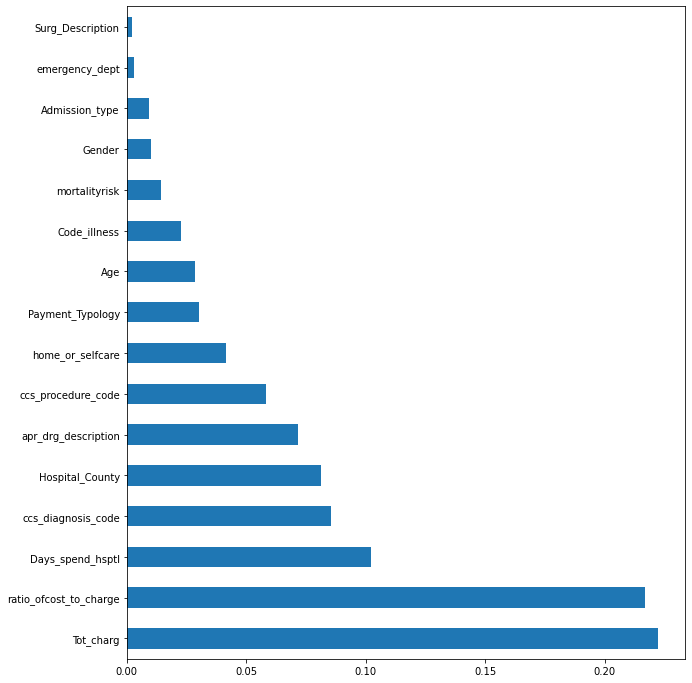

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
plt.figure(figsize=(10,12))
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [36]:
X=x.drop(['Surg_Description'],axis=1)

Check whether the data is balanced or not

[Text(0, 0, 'Fraud'), Text(1, 0, 'Genuine')]

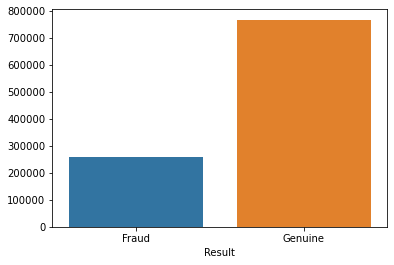

In [ ]:
bar = fraud.groupby("Result").count().iloc[:,0]
t=sns.barplot(x = bar.index, y=bar.values)
t.set_xticklabels(['Fraud','Genuine'])

In [ ]:
y.value_counts(normalize=True)

1    0.748505
0    0.251495
Name: Result, dtype: float64

## Handling The Imbalanced Data Using SMOTE

In [37]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [38]:
x_train_os, y_train_os = smote.fit_resample(X, y)

[Text(0, 0, 'Fraud'), Text(1, 0, 'Genuine')]

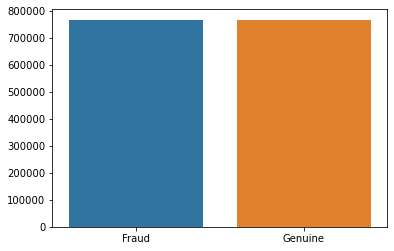

In [ ]:
bar=y_train_os.value_counts()
t=sns.barplot(x = bar.index, y=bar.values)
t.set_xticklabels(['Fraud','Genuine'])

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_os)))

Original dataset shape Counter({1: 766794, 0: 257640})
Resampled dataset shape Counter({1: 766794, 0: 766794})


## Model Building(Random Forest Classifier)

In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=20,max_features=8,min_samples_leaf=6,min_samples_split=5,n_jobs=-1)
classifier.fit(x_train_os,y_train_os)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [40]:
import xgboost 
from xgboost import XGBClassifier
clf =XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,eval_metric='auc',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=0, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=10,
              silent=None, subsample=1, verbosity=1)
clf.fit(x_train_os, y_train_os)

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=0, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=10,
              silent=None, subsample=1, verbosity=1)

In [41]:
pred = clf.predict(x_train_os)

In [42]:
cm = confusion_matrix(y_train_os, pred)
print(cm)
accuracy_score(y_train_os, pred)

[[494300 272494]
 [    90 766704]]


0.8222573468232668

In [43]:
import pickle
filename='model_Final'
pickle.dump(classifier,open(filename,'wb'))